In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
data=pd.read_csv(r"C:\Users\Dell\Desktop\MACHINE LEARNING\Class Assessment\Fish_dataset.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [26]:
fish=data.drop('Species',axis=1)
fish.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [27]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [28]:
fish.isna().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# Answer 1:

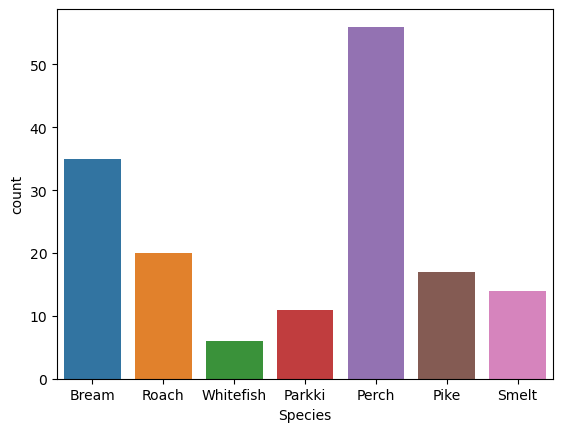

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x='Species',data=data)
plt.show()

# Answer 2:

<Axes: >

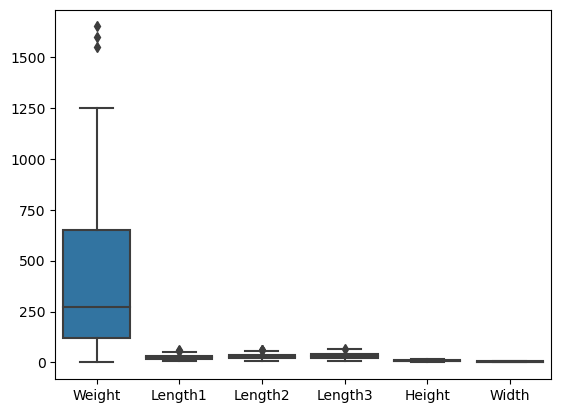

In [30]:
sns.boxplot(data=fish)

In [31]:
for i in fish:                  # i = column name 
    if fish[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = fish[i].quantile(0.25)  # for 1 column compute q1
        q3 = fish[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        fish[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

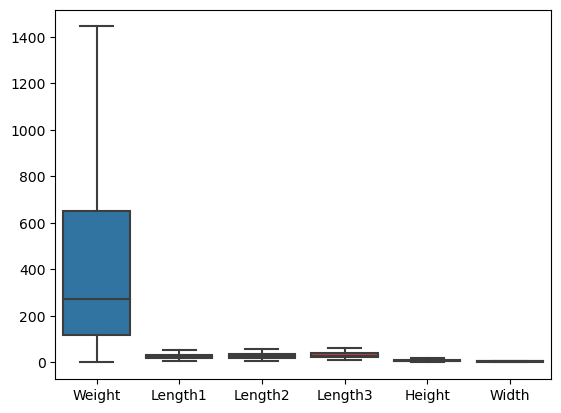

In [32]:
sns.boxplot(data=fish)

<Axes: xlabel='Weight', ylabel='Count'>

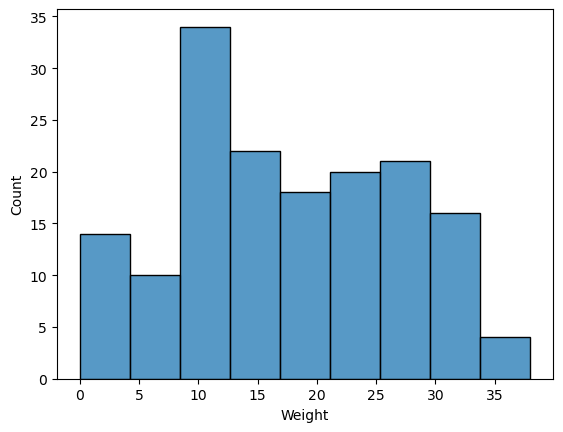

In [33]:
fish['Weight']=np.sqrt(fish['Weight'])
sns.histplot(x='Weight',data=fish)


# Answer 3:

In [34]:
x=fish.drop(['Weight'], axis=1)
x

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [35]:
y=fish['Weight']
y

0      15.556349
1      17.029386
2      18.439089
3      19.052559
4      20.736441
         ...    
154     3.492850
155     3.660601
156     3.492850
157     4.438468
158     4.460942
Name: Weight, Length: 159, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 ,random_state=140)

In [37]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Weight,Length1,Length2,Length3,Height,Width
23,26.076810,31.8,35.0,40.6,15.4686,6.1306
2,18.439089,23.9,26.5,31.1,12.3778,4.6961
89,11.618950,20.0,22.0,23.5,5.8750,3.5250
26,26.832816,32.0,35.0,40.6,16.3618,6.0900
46,11.832160,21.0,22.5,25.0,6.5500,3.3250


In [38]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.937848,0.942909,0.950583,0.814267,0.954797
Length1,0.937848,1.000000,0.999512,0.992560,0.643856,0.879442
Length2,0.942909,0.999512,1.000000,0.994637,0.659115,0.885674
Length3,0.950583,0.992560,0.994637,1.000000,0.708898,0.885593
Height,0.814267,0.643856,0.659115,0.708898,1.000000,0.807899
Width,0.954797,0.879442,0.885674,0.885593,0.807899,1.000000


<Axes: >

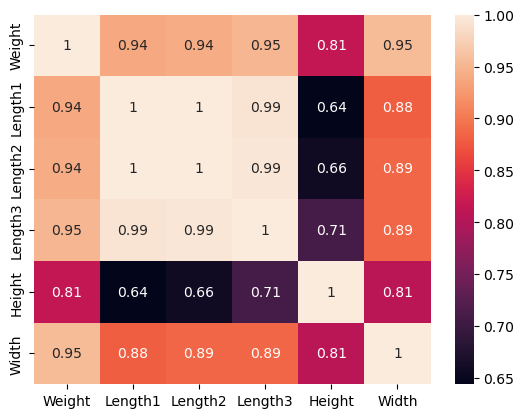

In [39]:
sns.heatmap(train.corr(),annot = True)

Correlation

Lengh1,Lengh2,Lengh3,Height,Width have high impact on Weight

# Model Builiding

H0 :- There is no Linear relationship between Height and all independent Variable Vs

H1 :- There is Linear relationship between Height and all independent Variable

Alpha = 0.05 (5%)

Method 2 -- Variable selection Method Forward Selection Method Backward Selection Method

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
lreg = LinearRegression()
Model3 = sfs(lreg, n_features_to_select = 4, direction='backward', scoring='r2',cv=5)
Model3.fit(X_train,y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=4, scoring='r2')

In [42]:
Model3.feature_names_in_

array(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype=object)

In [43]:
Model3.get_feature_names_out()

array(['Length1', 'Length2', 'Height', 'Width'], dtype=object)

import statsmodels.formula.api as smf
model = smf.ols(Weight,Lenght,Length2,Height,Width, data=train).fit
model.summary()

# Method 2 -- sklearn

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
X_train = X_train.loc[:,['Length1','Length2','Height','Width']]
X_train.head()

,Length1,Length2,Height,Width
23,31.8,35.0,15.4686,6.1306
2,23.9,26.5,12.3778,4.6961
89,20.0,22.0,5.8750,3.5250
26,32.0,35.0,16.3618,6.0900
46,21.0,22.5,6.5500,3.3250


In [46]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Weight,Length1,Length2,Height,Width
23,26.076810,31.8,35.0,15.4686,6.1306
2,18.439089,23.9,26.5,12.3778,4.6961
89,11.618950,20.0,22.0,5.8750,3.5250
26,26.832816,32.0,35.0,16.3618,6.0900
46,11.832160,21.0,22.5,6.5500,3.3250


In [47]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [48]:
np.round(Model3.intercept_,3)

-6.733

In [49]:
np.round(Model3.coef_,4)

array([ 0.7159, -0.243 ,  0.4951,  1.8226])

In [50]:
Model3.feature_names_in_

array(['Length1', 'Length2', 'Height', 'Width'], dtype=object)

# Model

y = -6.733 + 0.7159 * Length1  -0.243 * Length2 +  0.4951 * Height + 1.8226* Width 

# Prediction on Train

In [51]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.Weight - train.fitted_value,2)
train['Original_value']=train.fitted_value** 2

train

,Weight,Length1,Length2,Height,Width,fitted_value,Residual,Original_value
23,26.076810,31.8,35.0,15.4686,6.1306,26.36,-0.28,694.8496
2,18.439089,23.9,26.5,12.3778,4.6961,18.62,-0.18,346.7044
89,11.618950,20.0,22.0,5.8750,3.5250,11.57,0.05,133.8649
26,26.832816,32.0,35.0,16.3618,6.0900,26.87,-0.04,721.9969
46,11.832160,21.0,22.5,6.5500,3.3250,12.14,-0.31,147.3796
...,...,...,...,...,...,...,...,...
57,17.492856,25.6,28.0,8.7780,4.6816,17.67,-0.18,312.2289
80,9.219544,17.8,19.6,5.1376,3.0368,9.33,-0.11,87.0489
150,2.949576,10.8,11.3,1.9782,1.2852,1.57,1.38,2.4649
151,3.162278,11.3,11.8,2.2139,1.2838,1.92,1.24,3.6864


In [52]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Weight,train.fitted_value)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  97.0


# Assumption of Linear Regression

<Axes: title={'center': 'Weight vs Width'}, xlabel='Width', ylabel='Weight'>

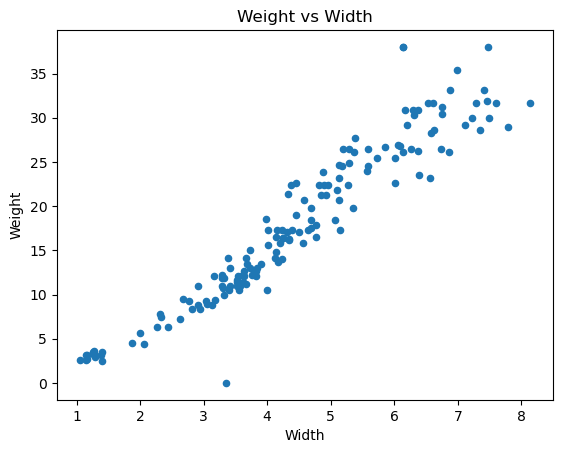

In [53]:

fish.plot.scatter(x='Width', y='Weight', title='Weight vs Width')


There is positive correlation between Height and Length3

# Homoscedasicity

<Axes: xlabel='fitted_value', ylabel='Residual'>

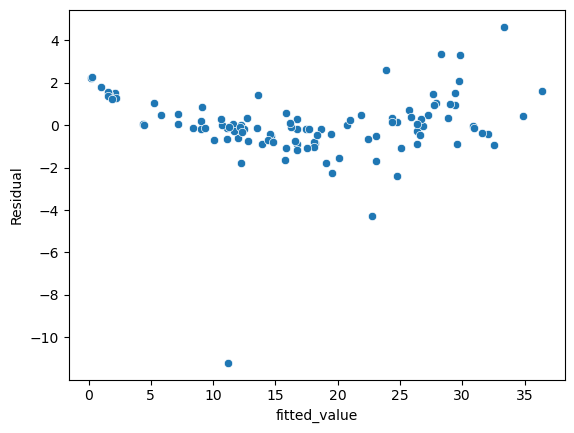

In [54]:
sns.scatterplot(x='fitted_value', y='Residual',data=train)

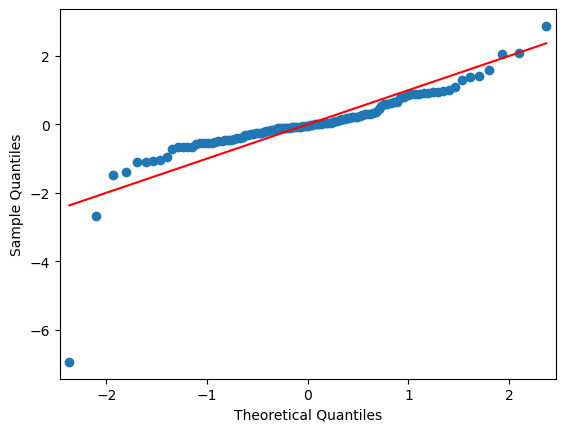

In [55]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

sample quantiles and Thepretical quantile follows thw normality

<Axes: ylabel='Frequency'>

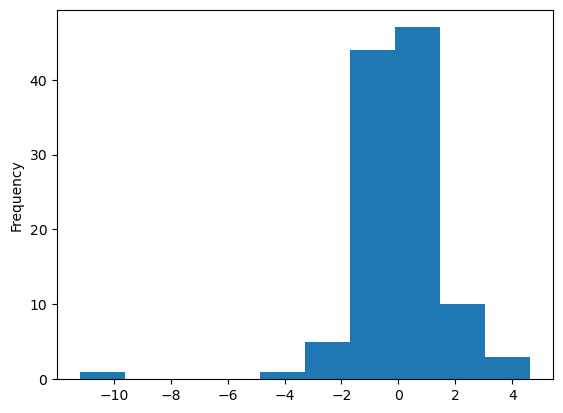

In [56]:
train['Residual'].plot.hist()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7412\1687080682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train.Residual)


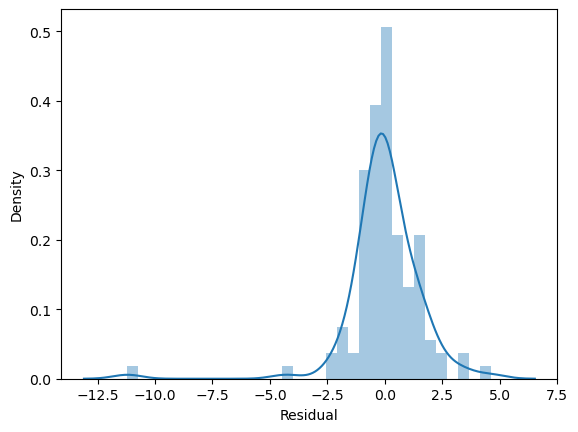

In [57]:
ax = sns.distplot(train.Residual) 

# Prediction on Test

In [58]:
X_test = X_test.loc[:,['Length1','Length2','Height','Width']]
X_test.head()

,Length1,Length2,Height,Width
49,22.0,23.4,6.9153,3.6312
8,27.6,30.0,14.0049,4.8438
45,20.5,22.5,7.0334,3.8203
14,29.4,32.0,14.9544,5.1708
116,36.5,39.0,11.1366,7.4934


In [59]:
test = pd.concat([y_test, X_test], axis=1)
test.head()

,Weight,Length1,Length2,Height,Width
49,12.688578,22.0,23.4,6.9153,3.6312
8,21.213203,27.6,30.0,14.0049,4.8438
45,12.649111,20.5,22.5,7.0334,3.8203
14,24.494897,29.4,32.0,14.9544,5.1708
116,30.000000,36.5,39.0,11.1366,7.4934


In [60]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Residual'] = np.round(test.Weight - test.Prediction,2)
test.head()

,Weight,Length1,Length2,Height,Width,Prediction,Residual
49,12.688578,22.0,23.4,6.9153,3.6312,13.37,-0.68
8,21.213203,27.6,30.0,14.0049,4.8438,21.50,-0.29
45,12.649111,20.5,22.5,7.0334,3.8203,12.92,-0.27
14,24.494897,29.4,32.0,14.9544,5.1708,23.37,1.12
116,30.000000,36.5,39.0,11.1366,7.4934,29.09,0.91


# Answer 4:

Loss Function -- RMSE

In [65]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['Weight'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)**2

print("RMSE of Train Data : ",np.round(model_rmse,2)) #21

RMSE of Train Data :  2.6


In [66]:
model_mse = mean_squared_error(test['Weight'],test['Prediction'])
model_rmse = np.sqrt(model_mse)**2

print("RMSE of Test Data : ",np.round(model_rmse,2)) #21

RMSE of Test Data :  1.45


# Mean score of model in between 2.6 to 1.45

# answer 5:

# Comparision

In [63]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Weight,train.fitted_value)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  97.0


In [64]:
r2 = r2_score(test.Weight,test.Prediction)
print('R2 score for model Performance on Test : ', np.round(r2,2)*100)

R2 score for model Performance on Test :  98.0


# conclusion

Model is good fit on Train dataset & Performance of model on Test data is also good fit